In [4]:
## load neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,recall_score,precision_score

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [5]:
##import dataset
df=pd.read_csv('diabetes.csv')

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.Outcome.unique()

array([1, 0], dtype=int64)

In [9]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [10]:
## 0 - No diabetes
## 1 - diabetes

In [32]:
df.rename(columns={'Pregnancies':'Preg', 'BloodPressure':'BP','SkinThickness':'ST','DiabetesPedigreeFunction':'DPF'},inplace=True)
df.head()

,preg,Glucose,BP,ST,Insulin,BMI,DPF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
df.shape

(768, 9)

In [15]:
## 768- Rows
## 9 -Columns

In [16]:
###check for Missing data
df.isnull().sum()

preg       0
Glucose    0
BP         0
ST         0
Insulin    0
BMI        0
DPF        0
Age        0
Outcome    0
dtype: int64

In [18]:
### check for zero values in data except columns (Outcome and Pregnancies)

In [19]:
df.iloc[:,1:-1]

,Glucose,BP,ST,Insulin,BMI,DPF,Age
0,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,183,64,0,0,23.3,0.672,32
3,89,66,23,94,28.1,0.167,21
4,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63
764,122,70,27,0,36.8,0.340,27
765,121,72,23,112,26.2,0.245,30
766,126,60,0,0,30.1,0.349,47


<function matplotlib.pyplot.show(close=None, block=None)>

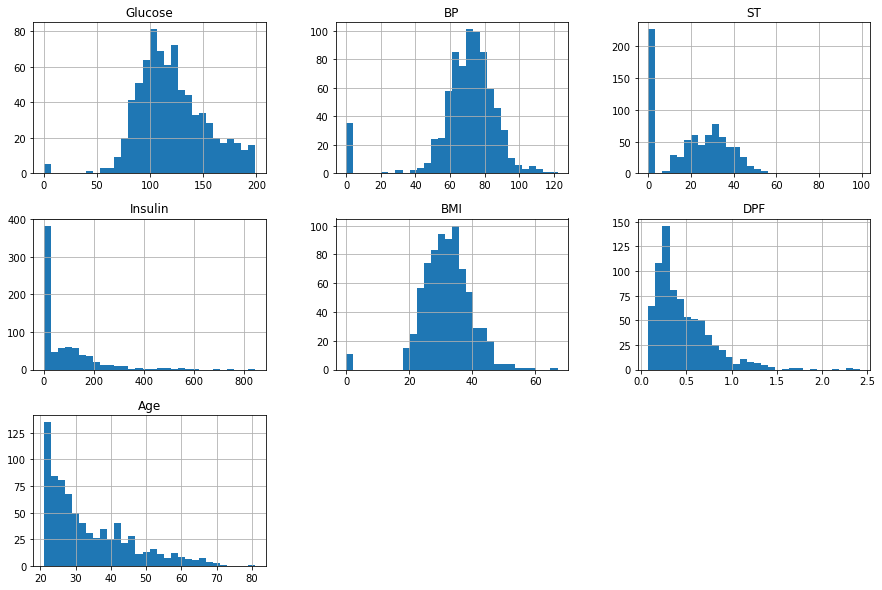

In [20]:
df.iloc[:,1:-1].hist(bins=30, figsize=(15,10))
plt.show

In [21]:
### Replace or drop 0 values

In [27]:
df.iloc[:,1:-1].isin([0]).sum()

Glucose      5
BP          35
ST         227
Insulin    374
BMI         11
DPF          0
Age          0
dtype: int64

In [28]:
### BP, ST and Insulin signficantly  contain zero values 

In [30]:
### Display statisical Information

df.iloc[:1:-3].describe()

,preg,Glucose,BP,ST,Insulin,BMI,DPF,Age,Outcome
count,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000
mean,3.945312,119.464844,70.285156,20.656250,75.066406,31.691016,0.478156,33.109375,0.351562
std,3.293031,31.795528,16.022800,15.822762,104.838024,7.052195,0.305626,11.186641,0.478393
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.085000,21.000000,0.000000
25%,1.000000,97.750000,64.000000,0.000000,0.000000,26.975000,0.254750,24.000000,0.000000
50%,3.000000,116.000000,72.000000,22.000000,26.000000,31.600000,0.389000,29.000000,0.000000
75%,6.000000,137.250000,80.000000,33.000000,116.250000,36.125000,0.648250,41.000000,1.000000
max,14.000000,197.000000,108.000000,54.000000,600.000000,55.000000,1.731000,68.000000,1.000000


In [33]:
### Replace zero values with median (can take any other option)

for col in ['Glucose','BP','ST' ,'Insulin','BMI']:
    df[col]=df[col].replace({0:df[col].median()})

In [34]:
df.iloc[:,1:-1].isin([0]).sum()

Glucose    0
BP         0
ST         0
Insulin    0
BMI        0
DPF        0
Age        0
dtype: int64

In [35]:
df.head()

,preg,Glucose,BP,ST,Insulin,BMI,DPF,Age,Outcome
0,6,148.0,72.0,35.0,30.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,30.5,26.6,0.351,31,0
2,8,183.0,64.0,23.0,30.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [37]:
df.corr()

,preg,Glucose,BP,ST,Insulin,BMI,DPF,Age,Outcome
preg,1.000000,0.128213,0.208615,0.032568,-0.055697,0.021546,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909,0.492782
BP,0.208615,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915,0.165723
ST,0.032568,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514,0.189065
Insulin,-0.055697,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413,0.148457
BMI,0.021546,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744,0.312249
DPF,-0.033523,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.189065,0.148457,0.312249,0.173844,0.238356,1.000000


In [38]:
### Glucose,BMI,Age,Preg

In [40]:
df_final = df.loc[:,['Glucose','BMI','Age','ST']]


In [41]:
df_final.head()

,Glucose,BMI,Age,ST
0,148.0,33.6,50,35.0
1,85.0,26.6,31,29.0
2,183.0,23.3,32,23.0
3,89.0,28.1,21,23.0
4,137.0,43.1,33,35.0


In [43]:
x=df_final.values
y=df.Outcome.values

In [44]:
x

array([[148. ,  33.6,  50. ,  35. ],
       [ 85. ,  26.6,  31. ,  29. ],
       [183. ,  23.3,  32. ,  23. ],
       ...,
       [121. ,  26.2,  30. ,  23. ],
       [126. ,  30.1,  47. ,  23. ],
       [ 93. ,  30.4,  23. ,  31. ]])

In [61]:
from sklearn.model_selection import train_test_split
xtrain,xtest, ytrain ,ytest=train_test_split(x,y,test_size=.20, random_state=12)


In [63]:
xtrain.shape

(614, 4)

In [65]:
xtest.shape

(154, 4)

In [66]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
std_train=std.fit_transform(xtrain)
std_test=std.transform(xtest)

In [ ]:
### Logistic Regression 

In [70]:
log=LogisticRegression(C=0.1,class_weight={1:3}, solver='sag')

In [73]:
log.fit(std_train,ytrain)
pred=log.predict(std_test)

In [74]:
pred

array([1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1],
      dtype=int64)

In [50]:
std_train

array([[ 0.86604475,  0.16724016,  1.4259954 ,  0.83111367],
       [-1.20506583, -0.85155088, -0.19067191,  0.1805664 ],
       [ 2.01666174, -1.33183808, -0.10558415, -0.46998087],
       ...,
       [-0.02157407, -0.90976751, -0.27575966, -0.46998087],
       [ 0.14279979, -0.34215536,  1.17073215, -0.46998087],
       [-0.94206766, -0.29849289, -0.87137393,  0.39741549]])

In [54]:
(std_test)


array([[ 0.86604475,  0.16724016,  1.4259954 ,  0.83111367],
       [-1.20506583, -0.85155088, -0.19067191,  0.1805664 ],
       [ 2.01666174, -1.33183808, -0.10558415, -0.46998087],
       ...,
       [-0.02157407, -0.90976751, -0.27575966, -0.46998087],
       [ 0.14279979, -0.34215536,  1.17073215, -0.46998087],
       [-0.94206766, -0.29849289, -0.87137393,  0.39741549]])

In [75]:
confusion_matrix(ytest,pred)

array([[63, 36],
       [10, 45]], dtype=int64)

In [76]:
np.bincount(ytest)

array([99, 55], dtype=int64)

In [77]:
recall_score(ytest,pred)

0.8181818181818182

In [78]:
       ####   KNN Algo

In [80]:
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(std_train, ytrain)
pred=knn.predict(std_test)

In [81]:
pred

array([0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0],
      dtype=int64)

In [82]:
confusion_matrix(ytest,pred)

array([[85, 14],
       [19, 36]], dtype=int64)

In [83]:
recall_score(ytest, pred)

0.6545454545454545

In [84]:
precision_score(ytest, pred)

0.72

In [85]:
### std_test data

In [86]:
std_test[0]

array([-0.140363  ,  1.86442524, -0.78538173,  0.43177272])

In [87]:
std_test[1]

array([ 1.64204825,  1.63035051, -0.61266526, -0.46689999])

In [88]:
### test Sample

test=std_test[0].reshape(1,-1)

In [89]:
log.predict(test)

array([1], dtype=int64)

In [90]:
ytest[0]

0

In [91]:
### test Sample 2
test=std_test[2].reshape(1,-1)
log.predict(test)

array([1], dtype=int64)

In [92]:
ytest[2]

1

In [94]:
### test Sample 5
test=std_test[5].reshape(1,-1)
log.predict(test)

array([1], dtype=int64)

In [95]:
ytest[5]

0